In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Reading and Understanding the Data

In [2]:
# Read the data
data = pd.read_csv("day.csv")
data.head(5)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
# Get the number of rows and columns and also check the type of the data

print(data.shape, end = "\n\n")
data.info()

(730, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### 1.1. Make the 'instant' column an index column

In [4]:
# Check whether the instant can be used an index by looking at unique values in the column
data["instant"].nunique()

730

In [5]:
# Drop 'instant' column as there is an index provided by dataframe
del data['instant']

In [6]:
# Get the number of rows and columns and also check the first few rows of the data

print(data.shape, end = "\n\n")
data.head(5)

(730, 15)



dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        6           0           2   
1  02-01-2018       1   0     1        0        0           0           2   
2  03-01-2018       1   0     1        0        1           1           1   
3  04-01-2018       1   0     1        0        2           1           1   
4  05-01-2018       1   0     1        0        3           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [7]:
# convert 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit' to String
data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']] = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']].astype(str)

In [8]:
# Get the number of rows and columns and also check the type of the data

print(data.shape, end = "\n\n")
data.info()

(730, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    object 
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    object 
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    object 
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 85.7+ KB


In [9]:
data.head(10)

dteday season yr mnth holiday weekday workingday weathersit       temp  \
0  01-01-2018      1  0    1       0       6          0          2  14.110847   
1  02-01-2018      1  0    1       0       0          0          2  14.902598   
2  03-01-2018      1  0    1       0       1          1          1   8.050924   
3  04-01-2018      1  0    1       0       2          1          1   8.200000   
4  05-01-2018      1  0    1       0       3          1          1   9.305237   
5  06-01-2018      1  0    1       0       4          1          1   8.378268   
6  07-01-2018      1  0    1       0       5          1          2   8.057402   
7  08-01-2018      1  0    1       0       6          0          2   6.765000   
8  09-01-2018      1  0    1       0       0          0          1   5.671653   
9  10-01-2018      1  0    1       0       1          1          1   6.184153   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600  
5  11.66045  51.8261   6.000868      88        1518  1606  
6  10.44195  49.8696  11.304642     148        1362  1510  
7   8.11270  53.5833  17.875868      68         891   959  
8   5.80875  43.4167  24.250650      54         768   822  
9   7.54440  48.2917  14.958889      41        1280  1321

# Assumptions  :
    
    Here 01-01-2018	is given as weekday(6) and as a non-working day.
    Since it is US data, Saturday and Sunday are holidays. So, going by that logic 01-01-2018 becomes Saturday.
    Going by calendar, it is Monday and beomes a working day.
    
    I'm assuming dteday is incorrect and keeping the sanctity of workingday with weekday. 
    So, in this notebook, 01-01-2018 becomes Saturday and be a non-working day rather than a Monday but a non-workday.

In [10]:
data.describe()

temp       atemp         hum   windspeed       casual  \
count  730.000000  730.000000  730.000000  730.000000   730.000000   
mean    20.319259   23.726322   62.765175   12.763620   849.249315   
std      7.506729    8.150308   14.237589    5.195841   686.479875   
min      2.424346    3.953480    0.000000    1.500244     2.000000   
25%     13.811885   16.889713   52.000000    9.041650   316.250000   
50%     20.465826   24.368225   62.625000   12.125325   717.000000   
75%     26.880615   30.445775   72.989575   15.625589  1096.500000   
max     35.328347   42.044800   97.250000   34.000021  3410.000000   

        registered          cnt  
count   730.000000   730.000000  
mean   3658.757534  4508.006849  
std    1559.758728  1936.011647  
min      20.000000    22.000000  
25%    2502.250000  3169.750000  
50%    3664.500000  4548.500000  
75%    4783.250000  5966.000000  
max    6946.000000  8714.000000

# 2. Visualizing the Data

#### 2.1. Check the relationship between numeric variables

<AxesSubplot:>

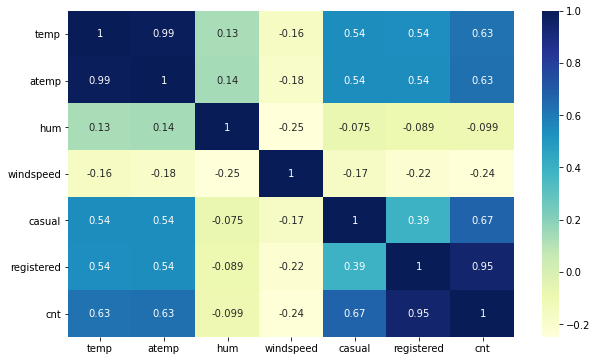

In [11]:
# Check the correlation betweeen different variables
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

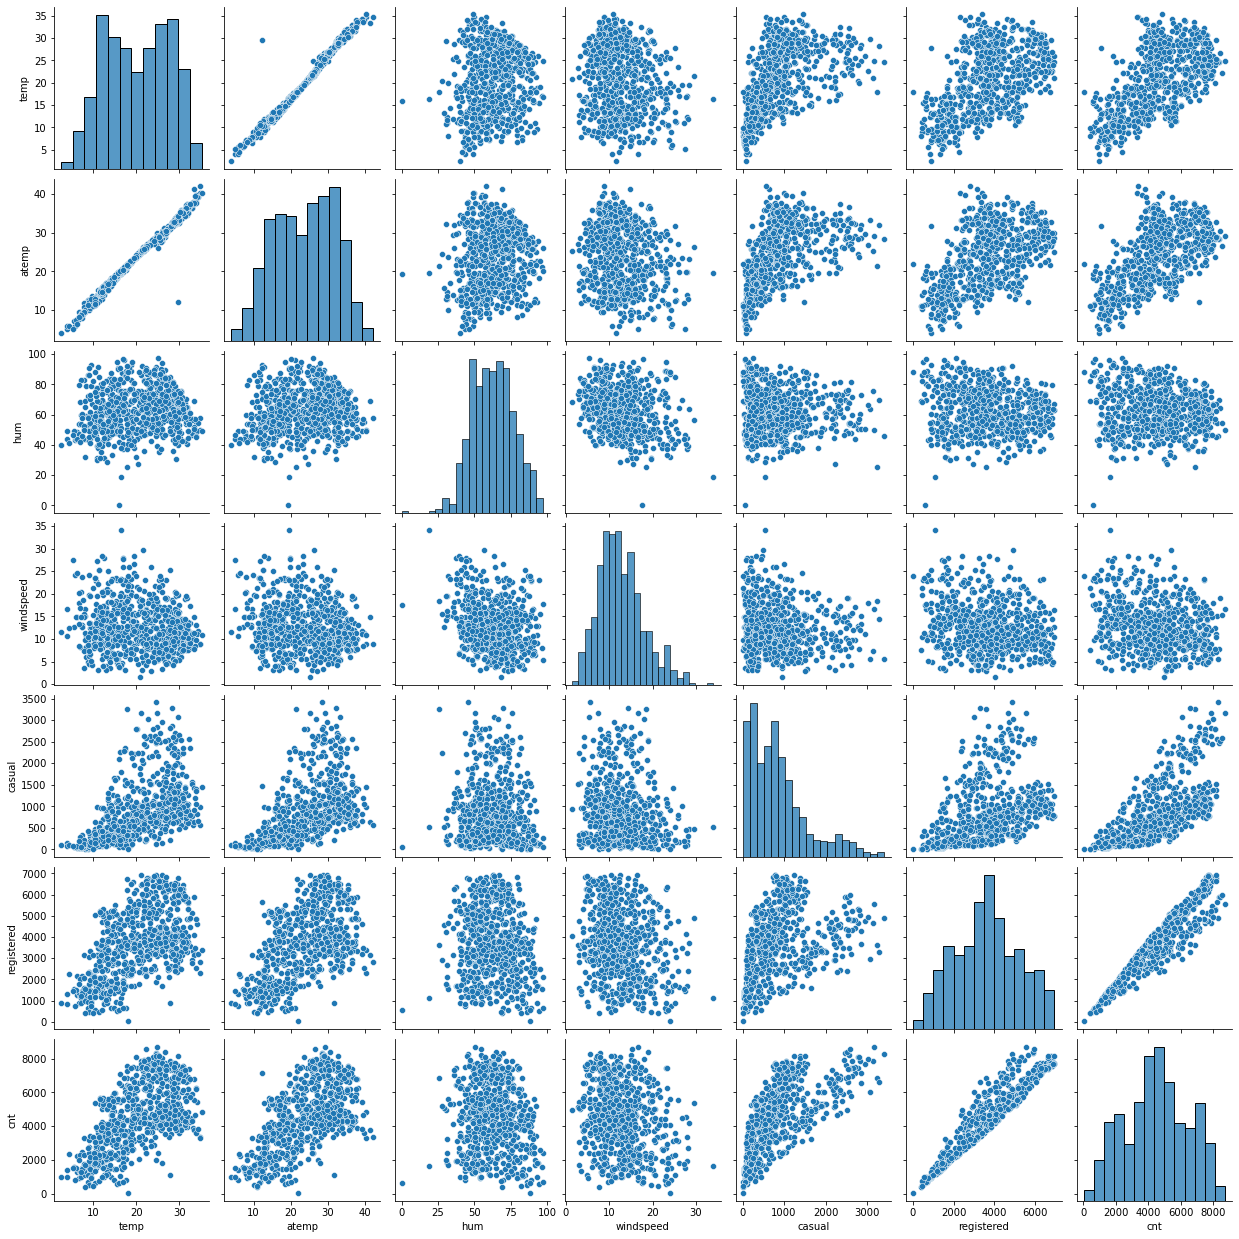

In [12]:
# Check the relationship between numeric variables
sns.pairplot(data=data)

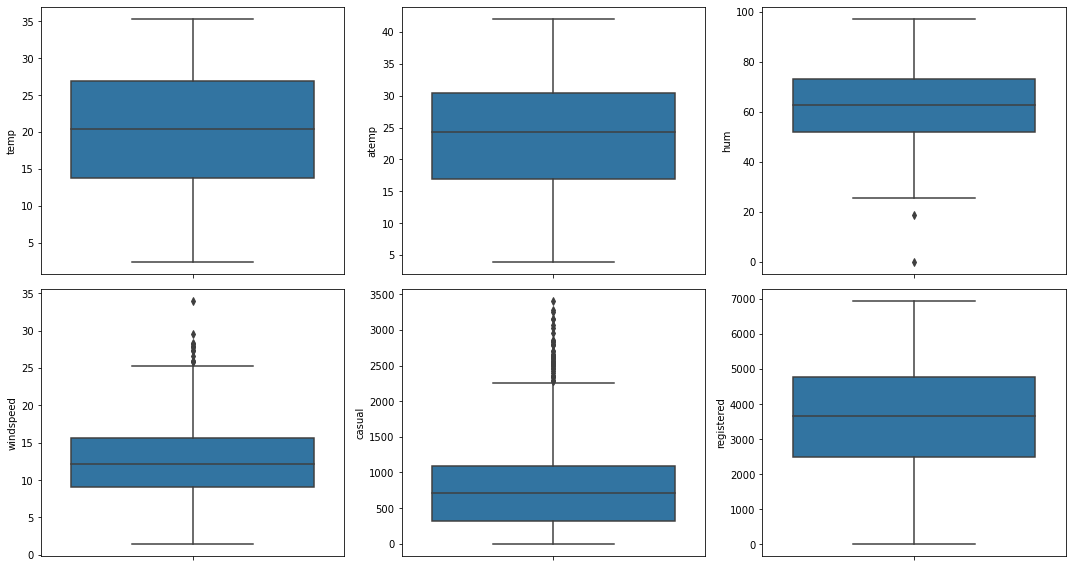

In [13]:
# Check for the outliers among the numeric variables 
plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
sns.boxplot(y = data['temp'])
plt.subplot(2,3,2)
sns.boxplot(y = data['atemp'])
plt.subplot(2,3,3)
sns.boxplot(y = data['hum'])
plt.subplot(2,3,4)
sns.boxplot(y = data['windspeed'])
plt.subplot(2,3,5)
sns.boxplot(y = data['casual'])
plt.subplot(2,3,6)
sns.boxplot(y = data['registered'])
plt.tight_layout()

#### 2.2 Check the realtionshop among categorial variables

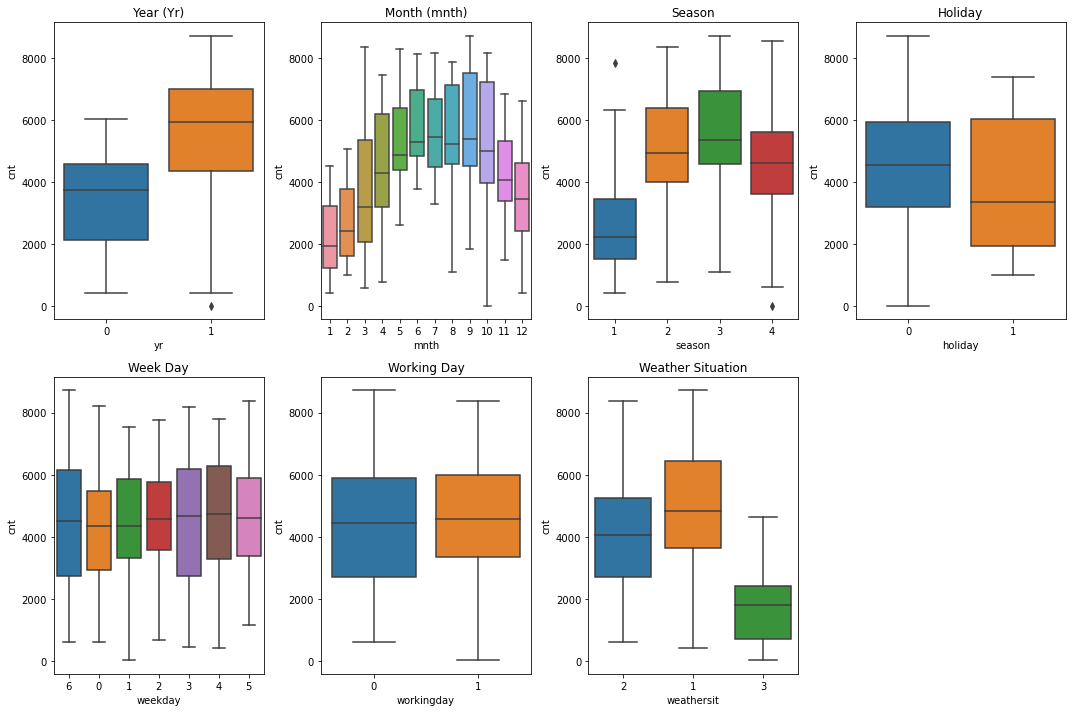

In [14]:
# Check for the outliers among the categorical variables 
plt.figure(figsize=(15, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = "cnt", data=data)
plt.title("Year (Yr)")
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = "cnt", data=data)
plt.title("Month (mnth)")
plt.subplot(2,4,3)
sns.boxplot(x = 'season', y = "cnt", data=data)
plt.title("Season")
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = "cnt", data=data)
plt.title("Holiday")
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = "cnt", data=data)
plt.title("Week Day")
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = "cnt", data=data)
plt.title("Working Day")
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = "cnt", data=data)
plt.title("Weather Situation")
plt.tight_layout()

# 3. Data Preparation

#### 3.1. Replace numeric values with proper meanings for categorical variables like season, mnth and weekday

In [15]:
# Check the data in 'season' column
data["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [16]:
# Convert the values in 'season' column to its original meanings
data['season'] = data['season'].map({'1' : 'spring', '2' : 'summer', '3' : 'fall', '4' : 'winter'})
data["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [17]:
# Check the data in 'mnth' column
data["mnth"].value_counts()

7     62
12    62
5     62
10    62
3     62
8     62
1     62
6     60
4     60
11    60
9     60
2     56
Name: mnth, dtype: int64

In [18]:
# Convert the values in 'mnth' column to its original meanings
import calendar
data['mnth'] = data['mnth'].apply(lambda x : calendar.month_abbr[int(x)].lower())  # Get the abbrevated form of month from numbers

data["mnth"].value_counts()

jan    62
mar    62
oct    62
may    62
aug    62
jul    62
dec    62
jun    60
nov    60
sep    60
apr    60
feb    56
Name: mnth, dtype: int64

In [19]:
# Check the data in 'weekday' column
data["weekday"].value_counts()

6    105
0    105
1    105
2    104
5    104
4    104
3    103
Name: weekday, dtype: int64

In [20]:
# Convert the values in 'weekday' column to its original meanings
week_days=["sunday", "monday","tuesday","wednesday","thursday","friday","saturday"]
data['weekday'] = data['weekday'].apply(lambda x : week_days[int(x)])
data["weekday"].value_counts()

sunday       105
saturday     105
monday       105
friday       104
tuesday      104
thursday     104
wednesday    103
Name: weekday, dtype: int64

In [21]:
# Check the data in 'weathersit' column
data["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [22]:
# Convert the values in 'weathersit' column to its original meanings
data['weathersit'] = data['weathersit'].map({'1' : 'clear', '2' : 'mist', '3' : 'rain'})
data["weathersit"].value_counts()

clear    463
mist     246
rain      21
Name: weathersit, dtype: int64

In [23]:
# Change the 'dteday' into three ranges
data['dteday'] = data['dteday'].apply(lambda x : "early_month(1-10)" if int(x.split("-")[0]) in range(1,11) else ("mid_month(11-20)" if int(x.split("-")[0]) in range(11,21) else "month_end(21-31)") )

# Check the data in 'dteday' column
data["dteday"].value_counts()

month_end(21-31)     250
mid_month(11-20)     240
early_month(1-10)    240
Name: dteday, dtype: int64

In [24]:
# show the top rows of the dataframe
data.head(15)

dteday  season yr mnth holiday    weekday workingday  \
0   early_month(1-10)  spring  0  jan       0   saturday          0   
1   early_month(1-10)  spring  0  jan       0     sunday          0   
2   early_month(1-10)  spring  0  jan       0     monday          1   
3   early_month(1-10)  spring  0  jan       0    tuesday          1   
4   early_month(1-10)  spring  0  jan       0  wednesday          1   
5   early_month(1-10)  spring  0  jan       0   thursday          1   
6   early_month(1-10)  spring  0  jan       0     friday          1   
7   early_month(1-10)  spring  0  jan       0   saturday          0   
8   early_month(1-10)  spring  0  jan       0     sunday          0   
9   early_month(1-10)  spring  0  jan       0     monday          1   
10   mid_month(11-20)  spring  0  jan       0    tuesday          1   
11   mid_month(11-20)  spring  0  jan       0  wednesday          1   
12   mid_month(11-20)  spring  0  jan       0   thursday          1   
13   mid_month(11-20)  spring  0  jan       0     friday          1   
14   mid_month(11-20)  spring  0  jan       0   saturday          0   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0        mist  14.110847  18.18125  80.5833  10.749882     331         654   
1        mist  14.902598  17.68695  69.6087  16.652113     131         670   
2       clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3       clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4       clear   9.305237  11.46350  43.6957  12.522300      82        1518   
5       clear   8.378268  11.66045  51.8261   6.000868      88        1518   
6        mist   8.057402  10.44195  49.8696  11.304642     148        1362   
7        mist   6.765000   8.11270  53.5833  17.875868      68         891   
8       clear   5.671653   5.80875  43.4167  24.250650      54         768   
9       clear   6.184153   7.54440  48.2917  14.958889      41        1280   
10       mist   6.932731   9.57320  68.6364   8.182844      43        1220   
11      clear   7.081807   8.02365  59.9545  20.410009      25        1137   
12      clear   6.765000   7.54415  47.0417  20.167000      38        1368   
13      clear   6.595670   9.42065  53.7826   8.478716      54        1367   
14       mist   9.566653  12.40560  49.8750  10.583521     222        1026   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248

#### 3.2. Dummy Variables for categorical Variables like season, mnth and weekday

In [25]:
# Create the dummy variables for season column
status = pd.get_dummies(data["season"], drop_first = True)

# Concat the status with main dataframe
data = pd.concat([data, status], axis=1)

In [26]:
# Check the data for season in dataframe
data[['season', 'spring', 'summer', 'winter']].value_counts()

season  spring  summer  winter
fall    0       0       0         188
summer  0       1       0         184
spring  1       0       0         180
winter  0       0       1         178
dtype: int64

In [27]:
# Drop 'season' as we have created the dummies for it
data.drop(['season'], axis = 1, inplace = True)

In [28]:
# Create the dummy variables for mnth column
status = pd.get_dummies(data["mnth"], drop_first = True)

# Concat the status with main dataframe
data = pd.concat([data, status], axis=1)

In [29]:
# Check the data for mnth in dataframe
data[['mnth', 'jan', 'feb', 'mar', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']].value_counts()

mnth  jan  feb  mar  may  jun  jul  aug  sep  oct  nov  dec
oct   0    0    0    0    0    0    0    0    1    0    0      62
may   0    0    0    1    0    0    0    0    0    0    0      62
mar   0    0    1    0    0    0    0    0    0    0    0      62
jul   0    0    0    0    0    1    0    0    0    0    0      62
jan   1    0    0    0    0    0    0    0    0    0    0      62
dec   0    0    0    0    0    0    0    0    0    0    1      62
aug   0    0    0    0    0    0    1    0    0    0    0      62
sep   0    0    0    0    0    0    0    1    0    0    0      60
nov   0    0    0    0    0    0    0    0    0    1    0      60
jun   0    0    0    0    1    0    0    0    0    0    0      60
apr   0    0    0    0    0    0    0    0    0    0    0      60
feb   0    1    0    0    0    0    0    0    0    0    0      56
dtype: int64

In [30]:
# Drop 'mnth' as we have created the dummies for it
data.drop(['mnth'], axis = 1, inplace = True)

In [31]:
# Create the dummy variables for weekday column
status = pd.get_dummies(data["weekday"], drop_first = True)

# Concat the status with main dataframe
data = pd.concat([data, status], axis=1)

In [32]:
# Check the data for weekday in dataframe
data[['weekday', 'sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'saturday']].value_counts()

weekday    sunday  monday  tuesday  wednesday  thursday  saturday
sunday     1       0       0        0          0         0           105
saturday   0       0       0        0          0         1           105
monday     0       1       0        0          0         0           105
tuesday    0       0       1        0          0         0           104
thursday   0       0       0        0          1         0           104
friday     0       0       0        0          0         0           104
wednesday  0       0       0        1          0         0           103
dtype: int64

In [33]:
# Drop 'weekday' as we have created the dummies for it
data.drop(['weekday'], axis = 1, inplace = True)

In [34]:
# Create the dummy variables for weathersit column
status = pd.get_dummies(data["weathersit"], drop_first = True)

# Concat the status with main dataframe
data = pd.concat([data, status], axis=1)

In [35]:
# Check the data for weathersit in dataframe
data[['weathersit', 'mist', 'rain']].value_counts()

weathersit  mist  rain
clear       0     0       463
mist        1     0       246
rain        0     1        21
dtype: int64

In [36]:
# Drop 'weathersit' as we have created the dummies for it
data.drop(['weathersit'], axis = 1, inplace = True)

In [37]:
# Create the dummy variables for dteday column
status = pd.get_dummies(data["dteday"], drop_first = True)

# Concat the status with main dataframe
data = pd.concat([data, status], axis=1)

In [38]:
# Check the data for dteday in dataframe
data[['dteday', 'month_end(21-31)', 'mid_month(11-20)']].value_counts()

dteday             month_end(21-31)  mid_month(11-20)
month_end(21-31)   1                 0                   250
mid_month(11-20)   0                 1                   240
early_month(1-10)  0                 0                   240
dtype: int64

In [39]:
# Drop 'dteday' as we have created the dummies for it
data.drop(['dteday'], axis = 1, inplace = True)

In [40]:
# convert 'yr', 'holiday', 'workingday' to int
data[['yr', 'holiday', 'workingday']] = data[['yr', 'holiday', 'workingday']].astype(int)

#### 3.3 All columns are not displayed, so removing the limit on the number of columns displayed in the dataframe

In [41]:
# Import display module from Ipython
from IPython.display import display

# Set the display of max_columns to None
pd.options.display.max_columns = None
data.sample(5)

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
73    0        0           1  13.013031  15.90890  65.5652  12.348703     289   
131   0        0           1  21.935000  26.16815  74.7500  12.707689     695   
694   1        0           1  12.846653  16.95020  53.5417   3.125550     337   
46    0        0           1  13.048701  15.81000  42.3478  16.869997     218   
524   1        0           0  29.144153  32.41835  43.7083   9.667229    2708   

     registered   cnt  spring  summer  winter  aug  dec  feb  jan  jul  jun  \
73         1767  2056       1       0       0    0    0    0    0    0    0   
131        4169  4864       0       1       0    0    0    0    0    0    0   
694        4750  5087       0       0       1    0    0    0    0    0    0   
46         1897  2115       1       0       0    0    0    1    0    0    0   
524        4790  7498       0       1       0    0    0    0    0    0    1   

     mar  may  nov  oct  sep  monday  saturday  sunday  thursday  tuesday  \
73     1    0    0    0    0       0         0       0         0        1   
131    0    1    0    0    0       0         0       0         1        0   
694    0    0    1    0    0       1         0       0         0        0   
46     0    0    0    0    0       0         0       0         0        0   
524    0    0    0    0    0       0         1       0         0        0   

     wednesday  mist  rain  mid_month(11-20)  month_end(21-31)  
73           0     1     0                 1                 0  
131          0     0     0                 1                 0  
694          0     0     0                 0                 1  
46           1     0     0                 1                 0  
524          0     0     0                 0                 0

# 4. Splitting the Data into Training and Testing Sets

#### 4.1 split the data into training and test sets

In [42]:
from sklearn.model_selection import train_test_split

# set the seed to zero so that same rows are placed in test and training sets everytime, the notebook is executed.
np.random.seed(0) 

# Split the data with 30% as test size
df_train,df_test = train_test_split(data, test_size=.3, random_state=101)

In [43]:
print(df_train.shape)
print(df_test.shape)
data.shape

(511, 34)
(219, 34)


(730, 34)

#### 4.2 Scale the training data using MinMaxScaler

In [44]:
# scale the numerical columns in the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   casual            730 non-null    int64  
 8   registered        730 non-null    int64  
 9   cnt               730 non-null    int64  
 10  spring            730 non-null    uint8  
 11  summer            730 non-null    uint8  
 12  winter            730 non-null    uint8  
 13  aug               730 non-null    uint8  
 14  dec               730 non-null    uint8  
 15  feb               730 non-null    uint8  
 16  jan               730 non-null    uint8  
 1

In [46]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.510763    0.027397    0.677104   20.282555   23.717568   62.613522   
std      0.500374    0.163398    0.468042    7.536906    8.161162   14.106686   
min      0.000000    0.000000    0.000000    2.424346    3.953480   18.791700   
25%      0.000000    0.000000    0.000000   13.752076   16.902725   52.104150   
50%      1.000000    0.000000    1.000000   19.850847   23.642900   62.916700   
75%      1.000000    0.000000    1.000000   26.855000   30.430100   72.854150   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.041700   

        windspeed       casual   registered          cnt      spring  \
count  511.000000   511.000000   511.000000   511.000000  511.000000   
mean    12.624878   842.305284  3659.291585  4501.596869    0.254403   
std      5.290370   678.560455  1566.036644  1941.060295    0.435952   
min      1.500244     2.000000    20.000000    22.000000    0.000000   
25%      8.813012   315.000000  2549.000000  3226.500000    0.000000   
50%     11.833875   699.000000  3685.000000  4511.000000    0.000000   
75%     15.625371  1109.000000  4695.000000  5929.500000    1.000000   
max     34.000021  3410.000000  6946.000000  8555.000000    1.000000   

           summer      winter         aug         dec         feb         jan  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.252446    0.240705    0.076321    0.086106    0.078278    0.088063   
std      0.434842    0.427930    0.265771    0.280795    0.268872    0.283664   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              jul        jun         mar         may         nov         oct  \
count  511.000000  511.00000  511.000000  511.000000  511.000000  511.000000   
mean     0.084149    0.09002    0.088063    0.088063    0.074364    0.084149   
std      0.277883    0.28649    0.283664    0.283664    0.262619    0.277883   
min      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.00000    1.000000    1.000000    1.000000    1.000000   

              sep      monday    saturday      sunday    thursday     tuesday  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.082192    0.144814    0.156556    0.138943    0.158513    0.136986   
std      0.274926    0.352258    0.363738    0.346226    0.365579    0.344170   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        wednesday        mist        rain  mid_month(11-20)  month_end(21-31)  
count  511.000000  511.000000  511.000000        511.000000        511.000000  
mean     0.135029    0.326810    0.029354          0.336595          0.332681  
std      0.342090    0.469507    0.168963          0.473008          0.471635  
min      0.000000    0.000000    0.000000          0.000000          0.000000  
25%      0.000000    0.000000    0.000000          0.00

In [47]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

pd.options.mode.chained_assignment = None  # to mitigate SettingWithCopyWarning

scaling_vars = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
df_train[scaling_vars] = scaler.fit_transform(df_train[scaling_vars])

In [48]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.510763    0.027397    0.677104    0.542737    0.518861    0.560023   
std      0.500374    0.163398    0.468042    0.229057    0.214253    0.180277   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.344266    0.339953    0.425718   
50%      1.000000    0.000000    1.000000    0.529616    0.516900    0.563898   
75%      1.000000    0.000000    1.000000    0.742483    0.695083    0.690894   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed      casual  registered         cnt      spring      summer  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.342299    0.246568    0.525454    0.524973    0.254403    0.252446   
std      0.162782    0.199108    0.226110    0.227477    0.435952    0.434842   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.225010    0.091843    0.365146    0.375542    0.000000    0.000000   
50%      0.317960    0.204519    0.529165    0.526075    0.000000    0.000000   
75%      0.434622    0.324824    0.674993    0.692312    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           winter         aug         dec         feb         jan         jul  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.240705    0.076321    0.086106    0.078278    0.088063    0.084149   
std      0.427930    0.265771    0.280795    0.268872    0.283664    0.277883   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             jun         mar         may         nov         oct         sep  \
count  511.00000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.09002    0.088063    0.088063    0.074364    0.084149    0.082192   
std      0.28649    0.283664    0.283664    0.262619    0.277883    0.274926   
min      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.00000    1.000000    1.000000    1.000000    1.000000    1.000000   

           monday    saturday      sunday    thursday     tuesday   wednesday  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.144814    0.156556    0.138943    0.158513    0.136986    0.135029   
std      0.352258    0.363738    0.346226    0.365579    0.344170    0.342090   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             mist        rain  mid_month(11-20)  month_end(21-31)  
count  511.000000  511.000000        511.000000        511.000000  
mean     0.326810    0.029354          0.336595          0.332681  
std      0.469507    0.168963          0.473008          0.471635  
min      0.000000    0.000000          0.000000          0.000000  
25%      0.000000    0.000000     

<AxesSubplot:>

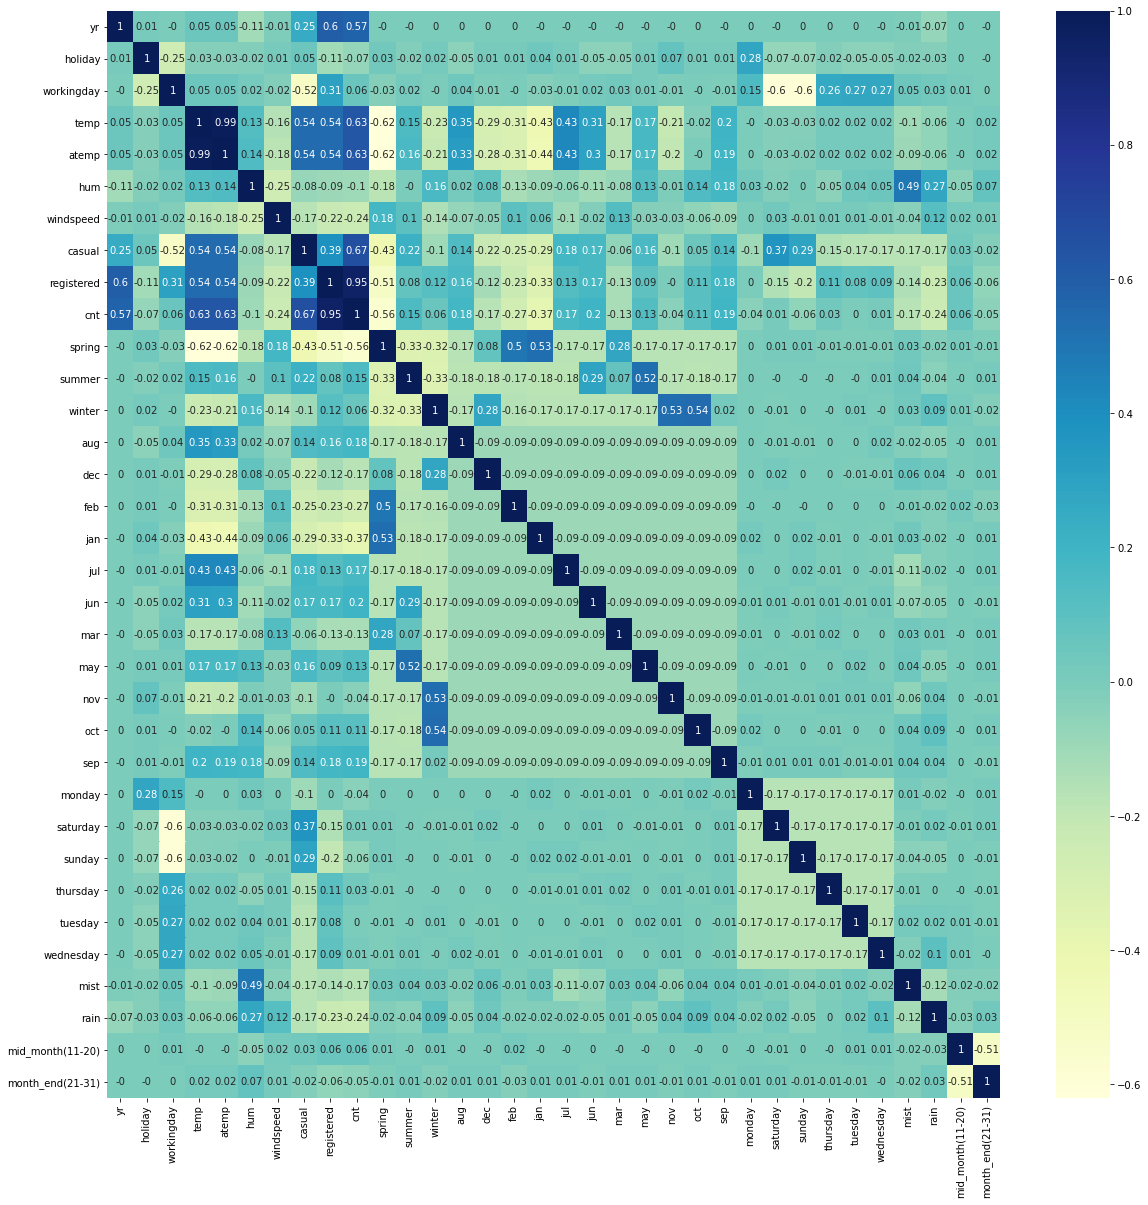

In [49]:
# Check the correlation betweeen different variables
plt.figure(figsize=(20, 20))
sns.heatmap(round(data.corr(),2), annot=True, cmap="YlGnBu")

#### 4.3 Dividing into X and Y sets for the model building

In [50]:
y_train = df_train.pop("cnt")
X_train = df_train
X_train_additional = df_train

# 5. Build a Linear Model

In [51]:
print(X_train.columns, end = "\n\n")

X_train.info()

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'spring', 'summer', 'winter', 'aug', 'dec',
       'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'monday',
       'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday', 'mist',
       'rain', 'mid_month(11-20)', 'month_end(21-31)'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 53 to 523
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                511 non-null    int64  
 1   holiday           511 non-null    int64  
 2   workingday        511 non-null    int64  
 3   temp              511 non-null    float64
 4   atemp             511 non-null    float64
 5   hum               511 non-null    float64
 6   windspeed         511 non-null    float64
 7   casual            511 non-null    float64
 8   registered        511 non-null    flo

In [52]:
import statsmodels.api as sm

# Add constant
X_train_lm = sm.add_constant(X_train)

# Build linear model using OLS
lm = sm.OLS(y_train, X_train_lm).fit()

# Get the summary of linear model regression
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.405e+29
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:29:11   Log-Likelihood:                 16781.
No. Observations:                 511   AIC:                        -3.350e+04
Df Residuals:                     478   BIC:                        -3.336e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.567e-16   5.67e-16     -0.453      0.651   -1.37e-15    8.57e-16
yr                        0   2.14e-16          0      1.000    -4.2e-16     4.2e-16
holiday          -3.478e-16   3.67e-16     -0.949      0.343   -1.07e-15    3.73e-16
workingday        6.245e-17   2.34e-16      0.267      0.789   -3.96e-16    5.21e-16
temp              3.997e-15   4.01e-15      0.997      0.319   -3.88e-15    1.19e-14
atemp            -3.997e-15   4.12e-15     -0.969      0.333   -1.21e-14    4.11e-15
hum               7.702e-16   5.37e-16      1.433      0.152   -2.86e-16    1.83e-15
windspeed         4.441e-16   4.65e-16      0.955      0.340    -4.7e-16    1.36e-15
casual               0.3994   6.23e-16   6.41e+14      0.000       0.399       0.399
registered           0.8117   7.09e-16   1.14e+15      0.000       0.812       0.812
spring            5.621e-16   4.62e-16      1.216      0.224   -3.46e-16    1.47e-15
summer            1.284e-16   3.81e-16      0.337      0.736    -6.2e-16    8.77e-16
winter             2.22e-16   4.24e-16      0.524      0.600    -6.1e-16    1.05e-15
aug              -5.551e-17   5.24e-16     -0.106      0.916   -1.09e-15    9.74e-16
dec              -1.457e-16   5.29e-16     -0.275      0.783   -1.19e-15    8.94e-16
feb                -1.7e-16   5.17e-16     -0.329      0.742   -1.19e-15    8.45e-16
jan              -9.021e-17   5.33e-16     -0.169      0.866   -1.14e-15    9.57e-16
jul               2.498e-16   5.36e-16      0.466      0.641   -8.03e-16     1.3e-15
jun               3.331e-16    3.9e-16      0.854      0.393   -4.33e-16     1.1e-15
mar              -1.874e-16   4.16e-16     -0.451      0.652      -1e-15    6.29e-16
may               9.714e-17   3.26e-16      0.298      0.766   -5.43e-16    7.37e-16
nov              -3.469e-18    5.7e-16     -0.006      0.995   -1.12e-15    1.12e-15
oct               1.388e-16   5.54e-16      0.250      0.802    -9.5e-16    1.23e-15
sep               8.327e-17   4.95e-16      0.168      0.866   -8.89e-16    1.06e-15
monday            1.093e-16    2.4e-16      0.455      0.650   -3.63e-16    5.82e-16
saturday         -7.286e-17   2.27e-16     -0.321      0.749   -5.19e-16    3.73e-16
sunday            1.041e-16   2.21e-16      0.471      0.638    -3.3e-16    5.38e-16
thursday          1.527e-16   2.31e-16      0.661      0.509   -3.01e-16    6.07e-16
tuesday           4.753e-16   2.39e-16      1.988      0.047    5.61e-18    9.45e-16
wednesday        -2.776e-17   2.44e-16     -0.114      0.909   -5.07e-16    4.52e-16
mist             -6.939e-17   1.75e-16     -0.396      0.692   -4.14e-16    2.75e-16
rain             -5.551e-17   4.71e-16     -0.118      0.906   -9.82e-16     8.7e-16
mid_month(11-20) -1.318e-16    1.5e-16     -0.878      0.380   -4.27e-16    1.63e-16
month_end(21-31) -3.296

In [53]:
# Access P-values
lm.pvalues

const               0.650696
yr                  1.000000
holiday             0.343278
workingday          0.789253
temp                0.319469
atemp               0.332919
hum                 0.152394
windspeed           0.340040
casual              0.000000
registered          0.000000
spring              0.224432
summer              0.736264
winter              0.600345
aug                 0.915673
dec                 0.783076
feb                 0.742283
jan                 0.865666
jul                 0.641408
jun                 0.393440
mar                 0.652398
may                 0.765614
nov                 0.995148
oct                 0.802345
sep                 0.866420
monday              0.649641
saturday            0.748501
sunday              0.637937
thursday            0.509104
tuesday             0.047335
wednesday           0.909460
mist                0.692490
rain                0.906282
mid_month(11-20)    0.380128
month_end(21-31)    0.030254
dtype: float64

In [54]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
3               temp  229.87
4              atemp  212.63
2         workingday   97.91
24          saturday   22.10
25            sunday   19.15
9             spring   11.05
11            winter    8.95
10            summer    7.47
8         registered    7.01
21               oct    6.46
15               jan    6.23
20               nov    6.11
16               jul    6.04
13               dec    6.01
12               aug    5.28
14               feb    5.26
22               sep    5.04
1            holiday    4.97
7             casual    4.20
18               mar    3.79
17               jun    3.40
0                 yr    3.11
5                hum    2.56
19               may    2.32
23            monday    1.95
26          thursday    1.94
28         wednesday    1.90
29              mist    1.85
27           tuesday    1.84
30              rain    1.73
6          windspeed    1.56
32  month_end(21-31)    1.39
31  mid_month(11-20)    1.37

In [55]:
# Get p-values and vif in single dataframe

vif.set_index("Features", inplace=True)            # make features as an index in vif dataframe
vif = pd.concat([vif, lm.pvalues], axis = 1)     # add p-values to vif dataframe
vif.columns = ['VIF', 'p-value']                   # add column names to vif dataframe
vif = vif.sort_values(by = "p-value", ascending = False)
vif

VIF   p-value
yr                  3.11  1.000000
nov                 6.11  0.995148
aug                 5.28  0.915673
wednesday           1.90  0.909460
rain                1.73  0.906282
sep                 5.04  0.866420
jan                 6.23  0.865666
oct                 6.46  0.802345
workingday         97.91  0.789253
dec                 6.01  0.783076
may                 2.32  0.765614
saturday           22.10  0.748501
feb                 5.26  0.742283
summer              7.47  0.736264
mist                1.85  0.692490
mar                 3.79  0.652398
const                NaN  0.650696
monday              1.95  0.649641
jul                 6.04  0.641408
sunday             19.15  0.637937
winter              8.95  0.600345
thursday            1.94  0.509104
jun                 3.40  0.393440
mid_month(11-20)    1.37  0.380128
holiday             4.97  0.343278
windspeed           1.56  0.340040
atemp             212.63  0.332919
temp              229.87  0.319469
spring             11.05  0.224432
hum                 2.56  0.152394
tuesday             1.84  0.047335
month_end(21-31)    1.39  0.030254
casual              4.20  0.000000
registered          7.01  0.000000

In [56]:
# Function to show vif and p-values in a single dataframe
def get_vif_and_pvalue(df, is_pvalue_sort=True) :
    # Add constant
    df = sm.add_constant(df)
    
    # Build linear model using OLS
    model = sm.OLS(y_train, df).fit()
    
    print("R-squared", model.rsquared, sep = " : ")
    print("Adjusted R-squared", model.rsquared_adj, end = "\n\n", sep = " : ")
    
    # Create a dataframe for p-values
    result = model.pvalues.to_frame()
    result = pd.concat([result, model.params], axis = 1)     # add regression coefficient to dataframe
    result.drop(result.index[[0]], inplace=True)            # remove values of constant from dataframe
    
    # Add column names to result dataframe
    result.columns = ['p-value', 'coeff']  
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    result['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    
    # Round the values to 2-3 decimals in the dataframe
    result['p-value'] = round(result['p-value'], 3)
    result['VIF'] = round(result['VIF'], 2)
    result['coeff'] = round(result['coeff'], 3)
    
    # Sort te dataframe
    if(is_pvalue_sort) : 
        result = result.sort_values(by = "VIF", ascending = False)
        print(result)
        result = result.sort_values(by = "p-value", ascending = False)
    else : 
        result = result.sort_values(by = "VIF", ascending = False)
        
    return result

In [57]:
# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 1.0
Adjusted R-squared : 1.0

                  p-value  coeff     VIF
temp                0.319  0.000  229.87
atemp               0.333 -0.000  212.63
workingday          0.789  0.000   97.91
saturday            0.749 -0.000   22.10
sunday              0.638  0.000   19.15
spring              0.224  0.000   11.05
winter              0.600  0.000    8.95
summer              0.736  0.000    7.47
registered          0.000  0.812    7.01
oct                 0.802  0.000    6.46
jan                 0.866 -0.000    6.23
nov                 0.995 -0.000    6.11
jul                 0.641  0.000    6.04
dec                 0.783 -0.000    6.01
aug                 0.916 -0.000    5.28
feb                 0.742 -0.000    5.26
sep                 0.866  0.000    5.04
holiday             0.343 -0.000    4.97
casual              0.000  0.399    4.20
mar                 0.652 -0.000    3.79
jun                 0.393  0.000    3.40
yr                  1.000  0.000    3.11
hum            

p-value  coeff     VIF
yr                  1.000  0.000    3.11
nov                 0.995 -0.000    6.11
aug                 0.916 -0.000    5.28
wednesday           0.909 -0.000    1.90
rain                0.906 -0.000    1.73
sep                 0.866  0.000    5.04
jan                 0.866 -0.000    6.23
oct                 0.802  0.000    6.46
workingday          0.789  0.000   97.91
dec                 0.783 -0.000    6.01
may                 0.766  0.000    2.32
saturday            0.749 -0.000   22.10
feb                 0.742 -0.000    5.26
summer              0.736  0.000    7.47
mist                0.692 -0.000    1.85
mar                 0.652 -0.000    3.79
monday              0.650  0.000    1.95
jul                 0.641  0.000    6.04
sunday              0.638  0.000   19.15
winter              0.600  0.000    8.95
thursday            0.509  0.000    1.94
jun                 0.393  0.000    3.40
mid_month(11-20)    0.380 -0.000    1.37
holiday             0.343 -0.000    4.97
windspeed           0.340  0.000    1.56
atemp               0.333 -0.000  212.63
temp                0.319  0.000  229.87
spring              0.224  0.000   11.05
hum                 0.152  0.000    2.56
tuesday             0.047  0.000    1.84
month_end(21-31)    0.030 -0.000    1.39
casual              0.000  0.399    4.20
registered          0.000  0.812    7.01

In [58]:
# Remove registered and casual columns as those cannot be used for prediction
X_train = X_train.drop(["registered"], axis = 1)
X_train = X_train.drop(["casual"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8463465750182834
Adjusted R-squared : 0.836743235956926

                  p-value  coeff     VIF
temp                0.503  0.181  229.49
atemp               0.345  0.262  212.21
workingday          0.000  0.100   84.74
saturday            0.000  0.107   19.23
sunday              0.000  0.055   17.26
spring              0.005 -0.087   10.85
winter              0.000  0.104    8.45
summer              0.470  0.018    7.45
oct                 0.897 -0.005    6.44
jan                 0.160 -0.050    6.17
nov                 0.044 -0.077    6.04
jul                 0.190 -0.047    6.00
dec                 0.047 -0.070    5.95
aug                 0.902  0.004    5.27
feb                 0.268 -0.038    5.21
sep                 0.044  0.067    4.98
holiday             0.989 -0.000    4.72
mar                 0.474  0.020    3.78
jun                 0.871 -0.004    3.36
hum                 0.000 -0.154    2.46
may                 0.111  0.035    2.31
monday              0.201 -

p-value  coeff     VIF
holiday             0.989 -0.000    4.72
thursday            0.960  0.001    1.90
aug                 0.902  0.004    5.27
oct                 0.897 -0.005    6.44
jun                 0.871 -0.004    3.36
wednesday           0.752 -0.005    1.84
temp                0.503  0.181  229.49
mar                 0.474  0.020    3.78
summer              0.470  0.018    7.45
atemp               0.345  0.262  212.21
tuesday             0.303 -0.016    1.81
feb                 0.268 -0.038    5.21
monday              0.201 -0.021    1.94
jul                 0.190 -0.047    6.00
month_end(21-31)    0.187 -0.013    1.39
jan                 0.160 -0.050    6.17
may                 0.111  0.035    2.31
mid_month(11-20)    0.078  0.018    1.36
dec                 0.047 -0.070    5.95
sep                 0.044  0.067    4.98
nov                 0.044 -0.077    6.04
spring              0.005 -0.087   10.85
hum                 0.000 -0.154    2.46
winter              0.000  0.104    8.45
sunday              0.000  0.055   17.26
mist                0.000 -0.057    1.76
rain                0.000 -0.230    1.52
windspeed           0.000 -0.183    1.44
saturday            0.000  0.107   19.23
workingday          0.000  0.100   84.74
yr                  0.000  0.238    1.09

### Drop temp variable as VIF and p-values are too high

In [59]:
# Drop temp variable from X-train dataframe
X_train = X_train.drop(["temp"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8462026076187052
Adjusted R-squared : 0.8369299997620367

                  p-value  coeff    VIF
workingday          0.000  0.099  84.73
saturday            0.000  0.107  19.23
sunday              0.000  0.054  17.26
spring              0.005 -0.087  10.84
winter              0.000  0.102   8.39
summer              0.500  0.017   7.41
atemp               0.000  0.444   6.64
oct                 0.929 -0.003   6.41
jan                 0.155 -0.051   6.17
nov                 0.044 -0.077   6.04
dec                 0.047 -0.070   5.95
jul                 0.234 -0.042   5.68
feb                 0.262 -0.039   5.21
aug                 0.780  0.010   5.01
sep                 0.027  0.071   4.76
holiday             0.943  0.002   4.69
mar                 0.455  0.021   3.78
jun                 0.955  0.001   3.01
hum                 0.000 -0.156   2.44
may                 0.074  0.038   2.19
monday              0.192 -0.021   1.94
thursday            0.947  0.001   1.90
wednesda

p-value  coeff    VIF
jun                 0.955  0.001   3.01
thursday            0.947  0.001   1.90
holiday             0.943  0.002   4.69
oct                 0.929 -0.003   6.41
wednesday           0.793 -0.004   1.83
aug                 0.780  0.010   5.01
summer              0.500  0.017   7.41
mar                 0.455  0.021   3.78
tuesday             0.307 -0.016   1.81
feb                 0.262 -0.039   5.21
jul                 0.234 -0.042   5.68
month_end(21-31)    0.205 -0.013   1.38
monday              0.192 -0.021   1.94
jan                 0.155 -0.051   6.17
mid_month(11-20)    0.082  0.018   1.36
may                 0.074  0.038   2.19
dec                 0.047 -0.070   5.95
nov                 0.044 -0.077   6.04
sep                 0.027  0.071   4.76
spring              0.005 -0.087  10.84
rain                0.000 -0.228   1.50
mist                0.000 -0.056   1.74
windspeed           0.000 -0.176   1.31
workingday          0.000  0.099  84.73
hum                 0.000 -0.156   2.44
saturday            0.000  0.107  19.23
atemp               0.000  0.444   6.64
winter              0.000  0.102   8.39
sunday              0.000  0.054  17.26
yr                  0.000  0.238   1.09

### Drop oct variable as VIF and p-values are too high`

In [60]:
# Drop oct variable from X-train dataframe
X_train = X_train.drop(["oct"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8462000538316206
Adjusted R-squared : 0.8372656171247437

                  p-value  coeff    VIF
workingday          0.000  0.099  72.43
saturday            0.000  0.106  16.41
sunday              0.000  0.054  14.86
spring              0.004 -0.088  10.81
atemp               0.000  0.445   6.63
winter              0.000  0.101   6.16
summer              0.426  0.018   5.97
jul                 0.193 -0.040   4.42
jan                 0.102 -0.049   4.37
holiday             0.954  0.001   4.15
aug                 0.710  0.011   3.80
feb                 0.202 -0.037   3.69
sep                 0.003  0.073   2.71
mar                 0.345  0.022   2.68
jun                 0.923  0.002   2.60
hum                 0.000 -0.156   2.41
dec                 0.001 -0.068   2.12
may                 0.059  0.039   2.02
monday              0.192 -0.021   1.94
thursday            0.946  0.001   1.90
nov                 0.000 -0.074   1.83
wednesday           0.795 -0.004   1.83
tuesday 

p-value  coeff    VIF
holiday             0.954  0.001   4.15
thursday            0.946  0.001   1.90
jun                 0.923  0.002   2.60
wednesday           0.795 -0.004   1.83
aug                 0.710  0.011   3.80
summer              0.426  0.018   5.97
mar                 0.345  0.022   2.68
tuesday             0.309 -0.016   1.81
month_end(21-31)    0.204 -0.013   1.38
feb                 0.202 -0.037   3.69
jul                 0.193 -0.040   4.42
monday              0.192 -0.021   1.94
jan                 0.102 -0.049   4.37
mid_month(11-20)    0.081  0.018   1.36
may                 0.059  0.039   2.02
spring              0.004 -0.088  10.81
sep                 0.003  0.073   2.71
dec                 0.001 -0.068   2.12
rain                0.000 -0.228   1.50
mist                0.000 -0.056   1.74
windspeed           0.000 -0.176   1.30
workingday          0.000  0.099  72.43
nov                 0.000 -0.074   1.83
hum                 0.000 -0.156   2.41
saturday            0.000  0.106  16.41
winter              0.000  0.101   6.16
atemp               0.000  0.445   6.63
sunday              0.000  0.054  14.86
yr                  0.000  0.238   1.09

### Drop summer variable as VIF and p-values are too high

In [61]:
# Drop summer variable from X-train dataframe
X_train = X_train.drop(["summer"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8459971602354708
Adjusted R-squared : 0.8373883058386958

                  p-value  coeff    VIF
workingday          0.000  0.103  51.26
saturday            0.000  0.110  11.67
sunday              0.000  0.058  10.51
atemp               0.000  0.440   6.55
spring              0.000 -0.104   6.10
jan                 0.095 -0.050   4.37
feb                 0.193 -0.038   3.68
holiday             0.826  0.005   3.28
jul                 0.029 -0.054   2.89
winter              0.000  0.087   2.89
mar                 0.337  0.023   2.68
jun                 0.973 -0.001   2.53
hum                 0.000 -0.157   2.41
aug                 0.875 -0.004   2.34
dec                 0.001 -0.070   2.08
may                 0.039  0.041   1.96
monday              0.194 -0.021   1.94
thursday            0.942  0.001   1.90
wednesday           0.788 -0.004   1.82
tuesday             0.305 -0.016   1.81
nov                 0.000 -0.077   1.78
sep                 0.002  0.062   1.75
mist    

p-value  coeff    VIF
jun                 0.973 -0.001   2.53
thursday            0.942  0.001   1.90
aug                 0.875 -0.004   2.34
holiday             0.826  0.005   3.28
wednesday           0.788 -0.004   1.82
mar                 0.337  0.023   2.68
tuesday             0.305 -0.016   1.81
monday              0.194 -0.021   1.94
feb                 0.193 -0.038   3.68
month_end(21-31)    0.190 -0.013   1.37
jan                 0.095 -0.050   4.37
mid_month(11-20)    0.080  0.018   1.36
may                 0.039  0.041   1.96
jul                 0.029 -0.054   2.89
sep                 0.002  0.062   1.75
dec                 0.001 -0.070   2.08
rain                0.000 -0.228   1.50
nov                 0.000 -0.077   1.78
mist                0.000 -0.055   1.73
windspeed           0.000 -0.176   1.30
workingday          0.000  0.103  51.26
saturday            0.000  0.110  11.67
hum                 0.000 -0.157   2.41
winter              0.000  0.087   2.89
spring              0.000 -0.104   6.10
atemp               0.000  0.440   6.55
sunday              0.000  0.058  10.51
yr                  0.000  0.238   1.09

### Drop jun variable as p-value is too high

In [62]:
# Drop jun variable from X-train dataframe
X_train = X_train.drop(["jun"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8459967931701136
Adjusted R-squared : 0.8377238936296652

                  p-value  coeff    VIF
workingday          0.000  0.103  51.25
saturday            0.000  0.110  11.67
sunday              0.000  0.058  10.51
spring              0.000 -0.104   6.05
atemp               0.000  0.440   4.72
jan                 0.094 -0.050   4.36
feb                 0.193 -0.038   3.68
holiday             0.822  0.005   3.26
mar                 0.326  0.023   2.60
winter              0.000  0.087   2.51
hum                 0.000 -0.156   2.32
dec                 0.001 -0.070   2.07
monday              0.192 -0.021   1.93
thursday            0.941  0.001   1.90
wednesday           0.788 -0.004   1.82
tuesday             0.305 -0.016   1.80
nov                 0.000 -0.077   1.77
mist                0.000 -0.055   1.72
jul                 0.004 -0.054   1.66
rain                0.000 -0.228   1.49
aug                 0.863 -0.003   1.46
may                 0.014  0.042   1.40
month_en

p-value  coeff    VIF
thursday            0.941  0.001   1.90
aug                 0.863 -0.003   1.46
holiday             0.822  0.005   3.26
wednesday           0.788 -0.004   1.82
mar                 0.326  0.023   2.60
tuesday             0.305 -0.016   1.80
feb                 0.193 -0.038   3.68
monday              0.192 -0.021   1.93
month_end(21-31)    0.189 -0.013   1.37
jan                 0.094 -0.050   4.36
mid_month(11-20)    0.080  0.018   1.36
may                 0.014  0.042   1.40
jul                 0.004 -0.054   1.66
dec                 0.001 -0.070   2.07
sep                 0.000  0.062   1.32
windspeed           0.000 -0.176   1.29
rain                0.000 -0.228   1.49
workingday          0.000  0.103  51.25
mist                0.000 -0.055   1.72
nov                 0.000 -0.077   1.77
saturday            0.000  0.110  11.67
hum                 0.000 -0.156   2.32
winter              0.000  0.087   2.51
atemp               0.000  0.440   4.72
spring              0.000 -0.104   6.05
sunday              0.000  0.058  10.51
yr                  0.000  0.238   1.07

### Drop thursday variable as p-value is too high

In [63]:
# Drop thursday variable from X-train dataframe
X_train = X_train.drop(["thursday"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8459950575435363
Adjusted R-squared : 0.8380566584478423

                  p-value  coeff    VIF
workingday          0.000  0.103  48.72
saturday            0.000  0.109  11.66
sunday              0.000  0.057  10.51
spring              0.000 -0.104   6.05
atemp               0.000  0.440   4.72
jan                 0.094 -0.050   4.36
feb                 0.193 -0.038   3.68
holiday             0.804  0.006   3.15
mar                 0.326  0.023   2.60
winter              0.000  0.087   2.51
hum                 0.000 -0.156   2.32
dec                 0.001 -0.070   2.07
nov                 0.000 -0.077   1.77
mist                0.000 -0.055   1.72
jul                 0.004 -0.054   1.66
rain                0.000 -0.228   1.49
aug                 0.865 -0.003   1.46
monday              0.114 -0.022   1.40
may                 0.014  0.042   1.39
month_end(21-31)    0.189 -0.013   1.37
mid_month(11-20)    0.080  0.018   1.36
wednesday           0.716 -0.005   1.31
sep     

p-value  coeff    VIF
aug                 0.865 -0.003   1.46
holiday             0.804  0.006   3.15
wednesday           0.716 -0.005   1.31
mar                 0.326  0.023   2.60
tuesday             0.209 -0.017   1.29
feb                 0.193 -0.038   3.68
month_end(21-31)    0.189 -0.013   1.37
monday              0.114 -0.022   1.40
jan                 0.094 -0.050   4.36
mid_month(11-20)    0.080  0.018   1.36
may                 0.014  0.042   1.39
jul                 0.004 -0.054   1.66
dec                 0.001 -0.070   2.07
workingday          0.000  0.103  48.72
windspeed           0.000 -0.176   1.29
sep                 0.000  0.062   1.31
mist                0.000 -0.055   1.72
rain                0.000 -0.228   1.49
saturday            0.000  0.109  11.66
nov                 0.000 -0.077   1.77
hum                 0.000 -0.156   2.32
winter              0.000  0.087   2.51
atemp               0.000  0.440   4.72
spring              0.000 -0.104   6.05
sunday              0.000  0.057  10.51
yr                  0.000  0.238   1.07

### Drop aug variable as p-value is too high

In [64]:
# Drop aug variable from X-train dataframe
X_train = X_train.drop(["aug"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8459858181712356
Adjusted R-squared : 0.8383801795624077

                  p-value  coeff    VIF
workingday          0.000  0.103  48.36
saturday            0.000  0.109  11.60
sunday              0.000  0.057  10.45
spring              0.000 -0.104   6.05
jan                 0.093 -0.050   4.36
atemp               0.000  0.438   4.32
feb                 0.192 -0.038   3.68
holiday             0.795  0.006   3.12
mar                 0.317  0.023   2.59
winter              0.000  0.088   2.42
hum                 0.000 -0.157   2.32
dec                 0.001 -0.070   2.06
nov                 0.000 -0.077   1.77
mist                0.000 -0.055   1.72
rain                0.000 -0.228   1.49
jul                 0.002 -0.053   1.42
monday              0.113 -0.022   1.40
month_end(21-31)    0.188 -0.013   1.37
mid_month(11-20)    0.079  0.018   1.36
wednesday           0.708 -0.005   1.31
tuesday             0.208 -0.017   1.29
windspeed           0.000 -0.175   1.29
may     

p-value  coeff    VIF
holiday             0.795  0.006   3.12
wednesday           0.708 -0.005   1.31
mar                 0.317  0.023   2.59
tuesday             0.208 -0.017   1.29
feb                 0.192 -0.038   3.68
month_end(21-31)    0.188 -0.013   1.37
monday              0.113 -0.022   1.40
jan                 0.093 -0.050   4.36
mid_month(11-20)    0.079  0.018   1.36
may                 0.008  0.043   1.26
jul                 0.002 -0.053   1.42
dec                 0.001 -0.070   2.06
workingday          0.000  0.103  48.36
sep                 0.000  0.063   1.21
windspeed           0.000 -0.175   1.29
nov                 0.000 -0.077   1.77
rain                0.000 -0.228   1.49
mist                0.000 -0.055   1.72
saturday            0.000  0.109  11.60
hum                 0.000 -0.157   2.32
winter              0.000  0.088   2.42
atemp               0.000  0.438   4.32
spring              0.000 -0.104   6.05
sunday              0.000  0.057  10.45
yr                  0.000  0.238   1.06

### Drop holiday variable as p-value is too high

In [65]:
# Drop holiday variable from X-train dataframe
X_train = X_train.drop(["holiday"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8459858181712356
Adjusted R-squared : 0.8383801795624077

                  p-value  coeff    VIF
hum                 0.000 -0.157  22.37
atemp               0.000  0.438  20.73
workingday          0.000  0.097  18.16
spring              0.000 -0.104   8.02
windspeed           0.000 -0.175   5.60
saturday            0.000  0.104   5.18
sunday              0.077  0.052   4.69
jan                 0.093 -0.050   4.29
feb                 0.192 -0.038   3.73
winter              0.000  0.088   3.04
mar                 0.317  0.023   2.71
mist                0.000 -0.055   2.53
yr                  0.000  0.238   2.17
dec                 0.001 -0.070   2.07
month_end(21-31)    0.188 -0.013   2.04
mid_month(11-20)    0.079  0.018   2.03
nov                 0.000 -0.077   1.79
monday              0.113 -0.022   1.54
jul                 0.002 -0.053   1.53
wednesday           0.708 -0.005   1.50
rain                0.000 -0.228   1.50
tuesday             0.208 -0.017   1.49
may     

p-value  coeff    VIF
wednesday           0.708 -0.005   1.50
mar                 0.317  0.023   2.71
tuesday             0.208 -0.017   1.49
feb                 0.192 -0.038   3.73
month_end(21-31)    0.188 -0.013   2.04
monday              0.113 -0.022   1.54
jan                 0.093 -0.050   4.29
mid_month(11-20)    0.079  0.018   2.03
sunday              0.077  0.052   4.69
may                 0.008  0.043   1.37
jul                 0.002 -0.053   1.53
dec                 0.001 -0.070   2.07
hum                 0.000 -0.157  22.37
rain                0.000 -0.228   1.50
nov                 0.000 -0.077   1.79
yr                  0.000  0.238   2.17
atemp               0.000  0.438  20.73
mist                0.000 -0.055   2.53
winter              0.000  0.088   3.04
saturday            0.000  0.104   5.18
windspeed           0.000 -0.175   5.60
spring              0.000 -0.104   8.02
workingday          0.000  0.097  18.16
sep                 0.000  0.063   1.31

### Drop wednesday variable as p-value is too high

In [66]:
# Drop wednesday variable from X-train dataframe
X_train = X_train.drop(["wednesday"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8459413790926242
Adjusted R-squared : 0.8386655099327276

                  p-value  coeff    VIF
hum                 0.000 -0.157  22.35
atemp               0.000  0.437  20.64
workingday          0.000  0.097  18.00
spring              0.000 -0.103   8.01
windspeed           0.000 -0.175   5.59
saturday            0.000  0.105   5.13
sunday              0.068  0.053   4.65
jan                 0.091 -0.050   4.28
feb                 0.190 -0.038   3.73
winter              0.000  0.088   3.04
mar                 0.325  0.023   2.70
mist                0.000 -0.055   2.53
yr                  0.000  0.238   2.17
dec                 0.001 -0.070   2.07
month_end(21-31)    0.187 -0.013   2.04
mid_month(11-20)    0.079  0.018   2.03
nov                 0.000 -0.077   1.79
jul                 0.002 -0.053   1.53
rain                0.000 -0.229   1.48
monday              0.122 -0.020   1.40
may                 0.008  0.043   1.37
tuesday             0.228 -0.015   1.34
sep     

p-value  coeff    VIF
mar                 0.325  0.023   2.70
tuesday             0.228 -0.015   1.34
feb                 0.190 -0.038   3.73
month_end(21-31)    0.187 -0.013   2.04
monday              0.122 -0.020   1.40
jan                 0.091 -0.050   4.28
mid_month(11-20)    0.079  0.018   2.03
sunday              0.068  0.053   4.65
may                 0.008  0.043   1.37
jul                 0.002 -0.053   1.53
dec                 0.001 -0.070   2.07
hum                 0.000 -0.157  22.35
rain                0.000 -0.229   1.48
nov                 0.000 -0.077   1.79
mist                0.000 -0.055   2.53
yr                  0.000  0.238   2.17
atemp               0.000  0.437  20.64
winter              0.000  0.088   3.04
saturday            0.000  0.105   5.13
windspeed           0.000 -0.175   5.59
spring              0.000 -0.103   8.01
workingday          0.000  0.097  18.00
sep                 0.000  0.063   1.31

### Drop mar variable as p-value is too high

In [67]:
# Drop mar variable from X-train dataframe
X_train = X_train.drop(["mar"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8456341245112456
Adjusted R-squared : 0.8386750071736379

                  p-value  coeff    VIF
hum                 0.000 -0.156  22.15
atemp               0.000  0.425  19.50
workingday          0.000  0.098  17.16
windspeed           0.000 -0.178   5.59
saturday            0.000  0.105   4.97
spring              0.000 -0.090   4.74
sunday              0.064  0.054   4.49
winter              0.000  0.087   3.03
mist                0.000 -0.055   2.53
jan                 0.001 -0.071   2.28
yr                  0.000  0.239   2.15
feb                 0.006 -0.057   2.05
month_end(21-31)    0.188 -0.013   2.04
mid_month(11-20)    0.076  0.018   2.02
nov                 0.000 -0.081   1.73
dec                 0.000 -0.080   1.68
jul                 0.002 -0.053   1.53
rain                0.000 -0.231   1.47
monday              0.115 -0.020   1.40
tuesday             0.237 -0.015   1.34
may                 0.011  0.040   1.34
sep                 0.000  0.061   1.30


p-value  coeff    VIF
tuesday             0.237 -0.015   1.34
month_end(21-31)    0.188 -0.013   2.04
monday              0.115 -0.020   1.40
mid_month(11-20)    0.076  0.018   2.02
sunday              0.064  0.054   4.49
may                 0.011  0.040   1.34
feb                 0.006 -0.057   2.05
jul                 0.002 -0.053   1.53
jan                 0.001 -0.071   2.28
rain                0.000 -0.231   1.47
dec                 0.000 -0.080   1.68
nov                 0.000 -0.081   1.73
hum                 0.000 -0.156  22.15
atemp               0.000  0.425  19.50
yr                  0.000  0.239   2.15
mist                0.000 -0.055   2.53
winter              0.000  0.087   3.03
spring              0.000 -0.090   4.74
saturday            0.000  0.105   4.97
windspeed           0.000 -0.178   5.59
workingday          0.000  0.098  17.16
sep                 0.000  0.061   1.30

### Drop tuesday variable as p-value is too high

In [68]:
# Drop tuesday variable from X-train dataframe
X_train = X_train.drop(["tuesday"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8451903110832188
Adjusted R-squared : 0.838542042234032

                  p-value  coeff    VIF
hum                 0.000 -0.157  22.09
atemp               0.000  0.427  19.50
workingday          0.000  0.097  17.06
windspeed           0.000 -0.179   5.57
saturday            0.000  0.108   4.94
spring              0.000 -0.090   4.73
sunday              0.050  0.056   4.46
winter              0.000  0.087   3.03
mist                0.000 -0.055   2.53
jan                 0.001 -0.070   2.28
yr                  0.000  0.239   2.15
feb                 0.007 -0.057   2.05
month_end(21-31)    0.193 -0.013   2.04
mid_month(11-20)    0.085  0.017   2.02
nov                 0.000 -0.081   1.73
dec                 0.000 -0.079   1.68
jul                 0.002 -0.054   1.52
rain                0.000 -0.230   1.46
may                 0.012  0.040   1.34
monday              0.182 -0.017   1.33
sep                 0.000  0.061   1.30


p-value  coeff    VIF
month_end(21-31)    0.193 -0.013   2.04
monday              0.182 -0.017   1.33
mid_month(11-20)    0.085  0.017   2.02
sunday              0.050  0.056   4.46
may                 0.012  0.040   1.34
feb                 0.007 -0.057   2.05
jul                 0.002 -0.054   1.52
jan                 0.001 -0.070   2.28
hum                 0.000 -0.157  22.09
rain                0.000 -0.230   1.46
dec                 0.000 -0.079   1.68
nov                 0.000 -0.081   1.73
yr                  0.000  0.239   2.15
atemp               0.000  0.427  19.50
mist                0.000 -0.055   2.53
winter              0.000  0.087   3.03
spring              0.000 -0.090   4.73
saturday            0.000  0.108   4.94
windspeed           0.000 -0.179   5.57
workingday          0.000  0.097  17.06
sep                 0.000  0.061   1.30

### Drop month_end(21-31) variable as p-value is too high

In [69]:
# Drop month_end(21-31) variable from X-train dataframe
X_train = X_train.drop(["month_end(21-31)"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8446521770021395
Adjusted R-squared : 0.838311449532839

                  p-value  coeff    VIF
hum                 0.000 -0.161  21.78
atemp               0.000  0.426  19.38
workingday          0.000  0.099  17.06
windspeed           0.000 -0.181   5.48
saturday            0.000  0.110   4.94
spring              0.000 -0.090   4.73
sunday              0.041  0.059   4.46
winter              0.000  0.087   3.03
mist                0.000 -0.055   2.52
jan                 0.001 -0.071   2.28
yr                  0.000  0.239   2.15
feb                 0.006 -0.057   2.05
nov                 0.000 -0.081   1.73
dec                 0.000 -0.078   1.68
jul                 0.002 -0.055   1.52
mid_month(11-20)    0.006  0.024   1.52
rain                0.000 -0.230   1.46
may                 0.012  0.040   1.34
monday              0.202 -0.016   1.33
sep                 0.000  0.062   1.29


p-value  coeff    VIF
monday              0.202 -0.016   1.33
sunday              0.041  0.059   4.46
may                 0.012  0.040   1.34
feb                 0.006 -0.057   2.05
mid_month(11-20)    0.006  0.024   1.52
jul                 0.002 -0.055   1.52
jan                 0.001 -0.071   2.28
hum                 0.000 -0.161  21.78
rain                0.000 -0.230   1.46
dec                 0.000 -0.078   1.68
nov                 0.000 -0.081   1.73
yr                  0.000  0.239   2.15
atemp               0.000  0.426  19.38
mist                0.000 -0.055   2.52
winter              0.000  0.087   3.03
spring              0.000 -0.090   4.73
saturday            0.000  0.110   4.94
windspeed           0.000 -0.181   5.48
workingday          0.000  0.099  17.06
sep                 0.000  0.062   1.29

### Drop monday variable as p-value is too high

In [70]:
# Drop monday variable from X-train dataframe
X_train = X_train.drop(["monday"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8441350432797206
Adjusted R-squared : 0.838103609109282

                  p-value  coeff    VIF
hum                 0.000 -0.164  21.25
atemp               0.000  0.427  19.17
workingday          0.000  0.109  16.37
windspeed           0.000 -0.182   5.38
spring              0.000 -0.090   4.70
saturday            0.000  0.123   4.56
sunday              0.008  0.072   4.12
winter              0.000  0.087   3.03
mist                0.000 -0.054   2.52
jan                 0.001 -0.071   2.27
yr                  0.000  0.238   2.13
feb                 0.007 -0.057   2.05
nov                 0.000 -0.079   1.73
dec                 0.000 -0.078   1.68
jul                 0.001 -0.056   1.52
mid_month(11-20)    0.006  0.024   1.52
rain                0.000 -0.230   1.46
may                 0.010  0.041   1.34
sep                 0.000  0.063   1.29


p-value  coeff    VIF
may                 0.010  0.041   1.34
sunday              0.008  0.072   4.12
feb                 0.007 -0.057   2.05
mid_month(11-20)    0.006  0.024   1.52
jan                 0.001 -0.071   2.27
jul                 0.001 -0.056   1.52
yr                  0.000  0.238   2.13
rain                0.000 -0.230   1.46
dec                 0.000 -0.078   1.68
nov                 0.000 -0.079   1.73
hum                 0.000 -0.164  21.25
atemp               0.000  0.427  19.17
mist                0.000 -0.054   2.52
winter              0.000  0.087   3.03
saturday            0.000  0.123   4.56
spring              0.000 -0.090   4.70
windspeed           0.000 -0.182   5.38
workingday          0.000  0.109  16.37
sep                 0.000  0.063   1.29

### Drop hum variable as VIF is too large

In [71]:
# Drop hum variable from X-train dataframe
X_train = X_train.drop(["hum"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8367701007346677
Adjusted R-squared : 0.8307982751517897

                  p-value  coeff    VIF
workingday          0.000  0.113  15.25
atemp               0.000  0.387  13.81
windspeed           0.000 -0.142   5.25
spring              0.000 -0.098   4.47
saturday            0.000  0.126   4.28
sunday              0.010  0.071   3.80
winter              0.000  0.075   2.79
jan                 0.001 -0.073   2.23
yr                  0.000  0.245   2.09
feb                 0.012 -0.054   2.05
nov                 0.000 -0.082   1.70
dec                 0.000 -0.085   1.63
mist                0.000 -0.087   1.59
mid_month(11-20)    0.005  0.025   1.52
jul                 0.006 -0.049   1.50
may                 0.067  0.029   1.29
sep                 0.002  0.051   1.26
rain                0.000 -0.302   1.10


p-value  coeff    VIF
may                 0.067  0.029   1.29
feb                 0.012 -0.054   2.05
sunday              0.010  0.071   3.80
jul                 0.006 -0.049   1.50
mid_month(11-20)    0.005  0.025   1.52
sep                 0.002  0.051   1.26
jan                 0.001 -0.073   2.23
nov                 0.000 -0.082   1.70
mist                0.000 -0.087   1.59
dec                 0.000 -0.085   1.63
workingday          0.000  0.113  15.25
atemp               0.000  0.387  13.81
yr                  0.000  0.245   2.09
winter              0.000  0.075   2.79
saturday            0.000  0.126   4.28
spring              0.000 -0.098   4.47
windspeed           0.000 -0.142   5.25
rain                0.000 -0.302   1.10

### Drop workingday variable as VIF is too large

In [72]:
# Drop workingday variable from X-train dataframe
X_train = X_train.drop(["workingday"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8304562803244012
Adjusted R-squared : 0.8246099451631737

                  p-value  coeff   VIF
atemp               0.000  0.386  5.68
windspeed           0.000 -0.145  4.61
spring              0.000 -0.098  3.99
winter              0.000  0.075  2.55
jan                 0.000 -0.080  2.18
yr                  0.000  0.245  2.08
feb                 0.008 -0.058  2.03
nov                 0.000 -0.088  1.68
dec                 0.000 -0.087  1.57
mist                0.000 -0.084  1.52
mid_month(11-20)    0.007  0.024  1.51
jul                 0.010 -0.046  1.49
may                 0.110  0.026  1.29
sep                 0.003  0.049  1.26
saturday            0.139  0.018  1.23
sunday              0.003 -0.037  1.19
rain                0.000 -0.298  1.09


p-value  coeff   VIF
saturday            0.139  0.018  1.23
may                 0.110  0.026  1.29
jul                 0.010 -0.046  1.49
feb                 0.008 -0.058  2.03
mid_month(11-20)    0.007  0.024  1.51
sunday              0.003 -0.037  1.19
sep                 0.003  0.049  1.26
atemp               0.000  0.386  5.68
mist                0.000 -0.084  1.52
dec                 0.000 -0.087  1.57
windspeed           0.000 -0.145  4.61
nov                 0.000 -0.088  1.68
yr                  0.000  0.245  2.08
jan                 0.000 -0.080  2.18
winter              0.000  0.075  2.55
spring              0.000 -0.098  3.99
rain                0.000 -0.298  1.09

### Drop may variable as p-value is too high

In [73]:
# Drop may variable from X-train dataframe
X_train = X_train.drop(["may"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8295738349587416
Adjusted R-squared : 0.8240539591679316

                  p-value  coeff   VIF
atemp               0.000  0.385  5.29
windspeed           0.000 -0.147  4.60
spring              0.000 -0.104  3.91
winter              0.000  0.070  2.46
jan                 0.000 -0.080  2.17
yr                  0.000  0.245  2.08
feb                 0.008 -0.058  2.03
nov                 0.000 -0.088  1.68
dec                 0.000 -0.088  1.56
mist                0.000 -0.084  1.51
mid_month(11-20)    0.007  0.024  1.51
jul                 0.003 -0.052  1.41
saturday            0.156  0.017  1.23
sep                 0.006  0.044  1.22
sunday              0.003 -0.037  1.19
rain                0.000 -0.298  1.09


p-value  coeff   VIF
saturday            0.156  0.017  1.23
feb                 0.008 -0.058  2.03
mid_month(11-20)    0.007  0.024  1.51
sep                 0.006  0.044  1.22
jul                 0.003 -0.052  1.41
sunday              0.003 -0.037  1.19
atemp               0.000  0.385  5.29
windspeed           0.000 -0.147  4.60
spring              0.000 -0.104  3.91
winter              0.000  0.070  2.46
jan                 0.000 -0.080  2.17
yr                  0.000  0.245  2.08
nov                 0.000 -0.088  1.68
dec                 0.000 -0.088  1.56
mist                0.000 -0.084  1.51
rain                0.000 -0.298  1.09

### Drop saturday variable as p-value is too high

In [74]:
# Drop saturday variable from X-train dataframe
X_train = X_train.drop(["saturday"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8288778686265957
Adjusted R-squared : 0.8236923494940683

                  p-value  coeff   VIF
atemp               0.000  0.384  5.23
windspeed           0.000 -0.145  4.56
spring              0.000 -0.104  3.90
winter              0.000  0.070  2.46
jan                 0.000 -0.080  2.17
yr                  0.000  0.245  2.08
feb                 0.007 -0.059  2.03
nov                 0.000 -0.089  1.68
dec                 0.000 -0.087  1.56
mid_month(11-20)    0.007  0.024  1.51
mist                0.000 -0.084  1.50
jul                 0.003 -0.052  1.41
sep                 0.006  0.045  1.22
sunday              0.001 -0.040  1.16
rain                0.000 -0.297  1.09


p-value  coeff   VIF
feb                 0.007 -0.059  2.03
mid_month(11-20)    0.007  0.024  1.51
sep                 0.006  0.045  1.22
jul                 0.003 -0.052  1.41
sunday              0.001 -0.040  1.16
atemp               0.000  0.384  5.23
windspeed           0.000 -0.145  4.56
spring              0.000 -0.104  3.90
winter              0.000  0.070  2.46
jan                 0.000 -0.080  2.17
yr                  0.000  0.245  2.08
nov                 0.000 -0.089  1.68
dec                 0.000 -0.087  1.56
mist                0.000 -0.084  1.50
rain                0.000 -0.297  1.09

### Drop mid_month(11-20) variable as coeff is too low

In [75]:
# Drop mid_month(11-20) variable from X-train dataframe
X_train = X_train.drop(["mid_month(11-20)"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8263848675308183
Adjusted R-squared : 0.8214844404046721

           p-value  coeff   VIF
atemp        0.000  0.384  5.06
windspeed    0.000 -0.145  4.54
spring       0.000 -0.101  3.86
winter       0.000  0.071  2.45
jan          0.000 -0.083  2.17
yr           0.000  0.245  2.08
feb          0.009 -0.058  2.03
nov          0.000 -0.091  1.68
dec          0.000 -0.088  1.56
mist         0.000 -0.083  1.50
jul          0.005 -0.050  1.41
sep          0.008  0.044  1.22
sunday       0.002 -0.038  1.16
rain         0.000 -0.298  1.09


p-value  coeff   VIF
feb          0.009 -0.058  2.03
sep          0.008  0.044  1.22
jul          0.005 -0.050  1.41
sunday       0.002 -0.038  1.16
atemp        0.000  0.384  5.06
windspeed    0.000 -0.145  4.54
spring       0.000 -0.101  3.86
winter       0.000  0.071  2.45
jan          0.000 -0.083  2.17
yr           0.000  0.245  2.08
nov          0.000 -0.091  1.68
dec          0.000 -0.088  1.56
mist         0.000 -0.083  1.50
rain         0.000 -0.298  1.09

### Drop sunday variable as coeff is too low

In [76]:
# Drop sunday variable from X-train dataframe
X_train = X_train.drop(["sunday"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8230128528262868
Adjusted R-squared : 0.8183834103448818

           p-value  coeff   VIF
atemp        0.000  0.390  5.01
windspeed    0.000 -0.144  4.53
spring       0.000 -0.100  3.85
winter       0.000  0.072  2.45
jan          0.000 -0.084  2.17
yr           0.000  0.245  2.08
feb          0.009 -0.058  2.03
nov          0.000 -0.092  1.67
dec          0.000 -0.088  1.56
mist         0.000 -0.082  1.50
jul          0.004 -0.051  1.41
sep          0.012  0.042  1.21
rain         0.000 -0.295  1.09


p-value  coeff   VIF
sep          0.012  0.042  1.21
feb          0.009 -0.058  2.03
jul          0.004 -0.051  1.41
atemp        0.000  0.390  5.01
windspeed    0.000 -0.144  4.53
spring       0.000 -0.100  3.85
winter       0.000  0.072  2.45
jan          0.000 -0.084  2.17
yr           0.000  0.245  2.08
nov          0.000 -0.092  1.67
dec          0.000 -0.088  1.56
mist         0.000 -0.082  1.50
rain         0.000 -0.295  1.09

### Drop sep variable as coeff is too low

In [77]:
# Drop sep variable from X-train dataframe
X_train = X_train.drop(["sep"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8207480441188016
Adjusted R-squared : 0.8164287198807004

           p-value  coeff   VIF
atemp        0.000  0.400  4.62
windspeed    0.000 -0.150  4.50
spring       0.000 -0.101  3.85
winter       0.000  0.075  2.44
jan          0.000 -0.084  2.17
yr           0.000  0.244  2.08
feb          0.009 -0.059  2.03
nov          0.000 -0.098  1.65
dec          0.000 -0.092  1.55
mist         0.000 -0.082  1.50
jul          0.001 -0.059  1.36
rain         0.000 -0.290  1.08


p-value  coeff   VIF
feb          0.009 -0.059  2.03
jul          0.001 -0.059  1.36
atemp        0.000  0.400  4.62
windspeed    0.000 -0.150  4.50
spring       0.000 -0.101  3.85
winter       0.000  0.075  2.44
jan          0.000 -0.084  2.17
yr           0.000  0.244  2.08
nov          0.000 -0.098  1.65
dec          0.000 -0.092  1.55
mist         0.000 -0.082  1.50
rain         0.000 -0.290  1.08

In [78]:
# Drop feb variable from X-train dataframe
X_train = X_train.drop(["feb"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8182637150766494
Adjusted R-squared : 0.8142575043869563

           p-value  coeff   VIF
atemp        0.000  0.421  4.57
windspeed    0.000 -0.147  4.47
winter       0.000  0.073  2.40
spring       0.000 -0.125  2.29
yr           0.000  0.243  2.08
nov          0.000 -0.091  1.64
jan          0.007 -0.051  1.58
mist         0.000 -0.080  1.50
dec          0.000 -0.078  1.45
jul          0.000 -0.062  1.36
rain         0.000 -0.290  1.08


p-value  coeff   VIF
jan          0.007 -0.051  1.58
atemp        0.000  0.421  4.57
windspeed    0.000 -0.147  4.47
winter       0.000  0.073  2.40
spring       0.000 -0.125  2.29
yr           0.000  0.243  2.08
nov          0.000 -0.091  1.64
mist         0.000 -0.080  1.50
dec          0.000 -0.078  1.45
jul          0.000 -0.062  1.36
rain         0.000 -0.290  1.08

### Drop jan variable as coeff is too low

In [79]:
# Drop jan variable from X-train dataframe
X_train = X_train.drop(["jan"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8156261062074605
Adjusted R-squared : 0.8119386283316097

           p-value  coeff   VIF
atemp          0.0  0.449  4.54
windspeed      0.0 -0.137  4.47
winter         0.0  0.075  2.38
yr             0.0  0.243  2.08
spring         0.0 -0.134  1.70
nov            0.0 -0.084  1.64
mist           0.0 -0.080  1.49
dec            0.0 -0.066  1.42
jul            0.0 -0.067  1.36
rain           0.0 -0.289  1.08


p-value  coeff   VIF
atemp          0.0  0.449  4.54
windspeed      0.0 -0.137  4.47
winter         0.0  0.075  2.38
yr             0.0  0.243  2.08
spring         0.0 -0.134  1.70
nov            0.0 -0.084  1.64
mist           0.0 -0.080  1.49
dec            0.0 -0.066  1.42
jul            0.0 -0.067  1.36
rain           0.0 -0.289  1.08

### Drop winter variable as coeff is too low

In [80]:
# Drop winter variable from X-train dataframe
X_train = X_train.drop(["winter"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.8066508962034908
Adjusted R-squared : 0.8031775590095416

           p-value  coeff   VIF
atemp        0.000  0.389  4.50
windspeed    0.000 -0.158  4.44
yr           0.000  0.246  2.06
spring       0.000 -0.172  1.59
mist         0.000 -0.081  1.48
jul          0.000 -0.072  1.33
nov          0.033 -0.042  1.11
dec          0.033 -0.038  1.09
rain         0.000 -0.284  1.08


p-value  coeff   VIF
nov          0.033 -0.042  1.11
dec          0.033 -0.038  1.09
atemp        0.000  0.389  4.50
windspeed    0.000 -0.158  4.44
yr           0.000  0.246  2.06
spring       0.000 -0.172  1.59
mist         0.000 -0.081  1.48
jul          0.000 -0.072  1.33
rain         0.000 -0.284  1.08

In [81]:
# Add constant
X_train_lm = sm.add_constant(X_train)

# Build linear model using OLS
lin_model = sm.OLS(y_train, X_train_lm).fit()

# Get the summary of linear model regression
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     232.2
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.77e-172
Time:                        20:29:13   Log-Likelihood:                 451.92
No. Observations:                 511   AIC:                            -883.8
Df Residuals:                     501   BIC:                            -841.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3433      0.027     12.809      0.000       0.291       0.396
yr             0.2457      0.009     27.313      0.000       0.228       0.263
atemp          0.3885      0.035     11.003      0.000       0.319       0.458
windspeed     -0.1584      0.029     -5.498      0.000      -0.215      -0.102
spring        -0.1725      0.015    -11.426      0.000      -0.202      -0.143
dec           -0.0379      0.018     -2.138      0.033      -0.073      -0.003
jul           -0.0722      0.018     -3.993      0.000      -0.108      -0.037
nov           -0.0419      0.020     -2.142      0.033      -0.080      -0.003
mist          -0.0810      0.010     -8.208      0.000      -0.100      -0.062
rain          -0.2842      0.027    -10.468      0.000      -0.338      -0.231
==============================================================================
Omnibus:                       60.615   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.452
Skew:                          -0.676   Prob(JB):                     9.45e-28
Kurtosis:                       5.005   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6. Residual Analysis on Training Data

In [82]:
# Predict the data using the linear model 
y_train_pred = lin_model.predict(X_train_lm)
errors = y_train - y_train_pred

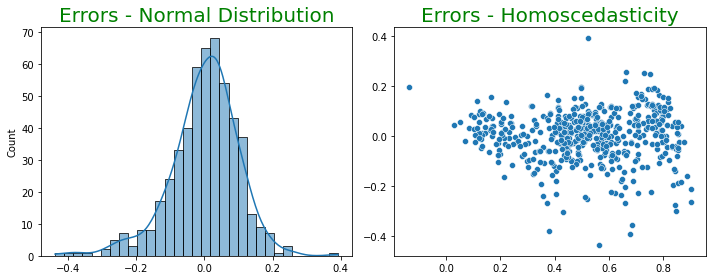

In [83]:
# Plots to show that the error distribution is nirmal and homoscedast.
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.histplot(errors, kde=True)
plt.title("Errors - Normal Distribution", fontdict = {'fontsize' : 20, 'color':'green'})
plt.subplot(1,2,2)
sns.scatterplot(x=y_train_pred, y=errors)
plt.title("Errors - Homoscedasticity", fontdict = {'fontsize' : 20, 'color':'green'})
plt.tight_layout()

In [84]:
# Show the scatter plot between predicted and actual y-values
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_train_pred, y=y_train)
plt.title("y_predicted vs y_train")
plt.xlabel("y-train Predicted")
plt.ylabel("y-train Actual")

Text(0, 0.5, 'y-train Actual')

In [85]:
# Get r-square and adjusted r-square for training data
from sklearn.metrics import r2_score
print("R-squared from sklearn", r2_score(y_train, y_train_pred), sep = " : ")
print("R-squared from statsmodels", lin_model.rsquared, sep = " : ")
print("Adjusted R-squared from statsmodels", lin_model.rsquared_adj, sep = " : ")

R-squared from sklearn : 0.8066508962034908
R-squared from statsmodels : 0.8066508962034908
Adjusted R-squared from statsmodels : 0.8031775590095416


# 7. Predict the Test Data

In [86]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.474886    0.031963    0.698630   20.404903   23.746746   63.119033   
std      0.500513    0.176306    0.459904    7.452308    8.143551   14.565001   
min      0.000000    0.000000    0.000000    3.993043    5.808750    0.000000   
25%      0.000000    0.000000    0.000000   14.025424   16.639300   51.958350   
50%      0.000000    0.000000    1.000000   21.080847   25.157300   62.041700   
75%      1.000000    0.000000    1.000000   26.889153   30.461575   73.375000   
max      1.000000    1.000000    1.000000   34.371653   41.318550   97.250000   

        windspeed       casual   registered          cnt      spring  \
count  219.000000   219.000000   219.000000   219.000000  219.000000   
mean    13.087349   865.452055  3657.511416  4522.963470    0.228311   
std      4.964999   705.924777  1548.578950  1928.528209    0.420705   
min      3.125550    38.000000   491.000000   605.000000    0.000000   
25%      9.646459   319.500000  2481.500000  2973.000000    0.000000   
50%     12.652213   729.000000  3628.000000  4629.000000    0.000000   
75%     15.639710  1088.000000  4841.000000  6017.500000    0.000000   
max     29.584721  3160.000000  6911.000000  8714.000000    1.000000   

           summer      winter         aug         dec         feb         jan  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.251142    0.251142    0.105023    0.082192    0.073059    0.077626   
std      0.434663    0.434663    0.307285    0.275286    0.260830    0.268194   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.500000    0.500000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              jul         jun         mar         may         nov         oct  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.063927    0.077626    0.077626    0.100457    0.086758   
std      0.282125    0.245183    0.268194    0.268194    0.301297    0.282125   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              sep      monday    saturday      sunday    thursday     tuesday  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.082192    0.141553    0.114155    0.155251    0.105023    0.155251   
std      0.275286    0.349389    0.318728    0.362974    0.307285    0.362974   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        wednesday        mist        rain  mid_month(11-20)  month_end(21-31)  
count  219.000000  219.000000  219.000000        219.000000        219.000000  
mean     0.155251    0.360731    0.027397          0.310502          0.365297  
std      0.362974    0.481313    0.163612          0.463759          0.482616  
min      0.000000    0.000000    0.000000          0.000000          0.000000  
25%      0.000000    0.000000    0.000000     

In [87]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables in Test data
scaling_vars = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
df_test[scaling_vars] = scaler.transform(df_test[scaling_vars])
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.474886    0.031963    0.698630    0.546455    0.519627    0.566483   
std      0.500513    0.176306    0.459904    0.226486    0.213790    0.186134   
min      0.000000    0.000000    0.000000    0.047675    0.048706   -0.240150   
25%      0.000000    0.000000    0.000000    0.352573    0.333037    0.423855   
50%      0.000000    0.000000    1.000000    0.566998    0.556658    0.552716   
75%      1.000000    0.000000    1.000000    0.743521    0.695909    0.697550   
max      1.000000    1.000000    1.000000    0.970925    0.980934    1.002662   

        windspeed      casual  registered         cnt      spring      summer  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.356529    0.253360    0.525197    0.527477    0.228311    0.251142   
std      0.152770    0.207138    0.223589    0.226008    0.420705    0.434663   
min      0.050010    0.010563    0.068005    0.068323    0.000000    0.000000   
25%      0.250654    0.093163    0.355400    0.345834    0.000000    0.000000   
50%      0.343140    0.213322    0.520936    0.539904    0.000000    0.000000   
75%      0.435063    0.318662    0.696073    0.702625    0.000000    0.500000   
max      0.864144    0.926643    0.994947    1.018634    1.000000    1.000000   

           winter         aug         dec         feb         jan         jul  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.251142    0.105023    0.082192    0.073059    0.077626    0.086758   
std      0.434663    0.307285    0.275286    0.260830    0.268194    0.282125   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.500000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              jun         mar         may         nov         oct         sep  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.063927    0.077626    0.077626    0.100457    0.086758    0.082192   
std      0.245183    0.268194    0.268194    0.301297    0.282125    0.275286   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           monday    saturday      sunday    thursday     tuesday   wednesday  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.141553    0.114155    0.155251    0.105023    0.155251    0.155251   
std      0.349389    0.318728    0.362974    0.307285    0.362974    0.362974   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             mist        rain  mid_month(11-20)  month_end(21-31)  
count  219.000000  219.000000        219.000000        219.000000  
mean     0.360731    0.027397          0.310502          0.365297  
std      0.481313    0.163612          0.463759          0.482616  
min      0.000000    0.000000          0.000000          0.000000  
25%      0.000000    0.00

In [88]:
# Create y_test and X_test
y_test = df_test.pop("cnt")
X_test = df_test

In [89]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

X_test_lm = sm.add_constant(X_test_new)      # add constant
y_test_pred = lin_model.predict(X_test_lm)   # predict the data y_test_pred on X-test_lm

# 8. Model Evaluation

Text(0, 0.5, 'y-test Actual')

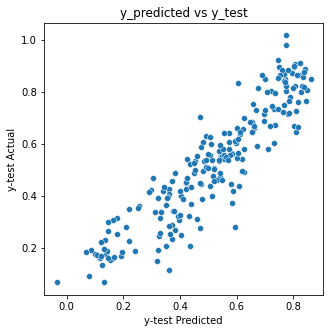

In [90]:
# Show the scatter plot between predicted and actual y-values
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test_pred, y=y_test)
plt.title("y_predicted vs y_test")
plt.xlabel("y-test Predicted")
plt.ylabel("y-test Actual")

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8362232476411642